In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

from tqdm import tqdm

In [2]:
plt.rcParams.update({'font.size': 20})

In [3]:
root_fig = '/home/tc/OneDrive/Software/MSFiltration/figures/'

In [4]:
# Load data
root = '/home/tc/OneDrive/Software/MSFiltration/experiments/results/stability/'

with open(root+'stability_singlescale_sbm_02-07_20_06.pkl', 'rb') as handle:
    results_single = pickle.load(handle)

persistence_single = results_single['persistence']
bottleneck_single = results_single['bottleneck']
wasserstein_single = results_single['wasserstein']

with open(root+'stability_sbm_05-04_06_55.pkl', 'rb') as handle:
    results_sbm = pickle.load(handle)

persistence_sbm = results_sbm['persistence']
bottleneck_sbm = results_sbm['bottleneck']
wasserstein_sbm = results_sbm['wasserstein']

with open(root+'stability_er_05-05_01_21.pkl', 'rb') as handle:
    results_er = pickle.load(handle)

persistence_er = results_er['persistence']
bottleneck_er = results_er['bottleneck']
wasserstein_er = results_er['wasserstein']

In [6]:
print('### 100 singlescale SBM realisations ###')

for i in range(4):
    print('Mean pair-wise bottleneck distance for {}-dimensional Dgm: '.format(i), np.around(bottleneck_single[:,:,i].mean(),5))
    
for i in range(4):  
    print('Mean pair-wise 2-Wasserstein distance W_1[L_\infty]for {}-dimensional Dgm: '.format(i), np.around(wasserstein_single[:,:,i].mean(),3))
    

### 100 singlescale SBM realisations ###
Mean pair-wise bottleneck distance for 0-dimensional Dgm:  0.07351
Mean pair-wise bottleneck distance for 1-dimensional Dgm:  inf
Mean pair-wise bottleneck distance for 2-dimensional Dgm:  0.10963
Mean pair-wise bottleneck distance for 3-dimensional Dgm:  0.0
Mean pair-wise 2-Wasserstein distance W_1[L_\infty]for 0-dimensional Dgm:  0.369
Mean pair-wise 2-Wasserstein distance W_1[L_\infty]for 1-dimensional Dgm:  1.185
Mean pair-wise 2-Wasserstein distance W_1[L_\infty]for 2-dimensional Dgm:  0.42
Mean pair-wise 2-Wasserstein distance W_1[L_\infty]for 3-dimensional Dgm:  0.0


In [6]:
print('### 100 SBM realisations ###')

for i in range(4):
    print('Mean pair-wise bottleneck distance for {}-dimensional Dgm: '.format(i), np.around(bottleneck_sbm[:,:,i].mean(),5))
    
for i in range(4):  
    print('Mean pair-wise Wasserstein distance W_1[L_\infty]for {}-dimensional Dgm: '.format(i), np.around(wasserstein_sbm[:,:,i].mean(),5))
    
print('\n### 100 ER realisations ###')

for i in range(4):
    print('Mean pair-wise bottleneck distance for {}-dimensional Dgm: '.format(i), np.around(bottleneck_er[:,:,i].mean(),5))
    
for i in range(4):  
    print('Mean pair-wise Wasserstein distance W_1[L_\infty] for {}-dimensional Dgm: '.format(i), np.around(wasserstein_er[:,:,i].mean(),5))
    

### 100 SBM realisations ###
Mean pair-wise bottleneck distance for 0-dimensional Dgm:  inf
Mean pair-wise bottleneck distance for 1-dimensional Dgm:  inf
Mean pair-wise bottleneck distance for 2-dimensional Dgm:  0.0165
Mean pair-wise bottleneck distance for 3-dimensional Dgm:  0.0
Mean pair-wise Wasserstein distance W_1[L_\infty]for 0-dimensional Dgm:  4.65349
Mean pair-wise Wasserstein distance W_1[L_\infty]for 1-dimensional Dgm:  3.49683
Mean pair-wise Wasserstein distance W_1[L_\infty]for 2-dimensional Dgm:  0.0169
Mean pair-wise Wasserstein distance W_1[L_\infty]for 3-dimensional Dgm:  0.0

### 100 ER realisations ###
Mean pair-wise bottleneck distance for 0-dimensional Dgm:  0.09069
Mean pair-wise bottleneck distance for 1-dimensional Dgm:  inf
Mean pair-wise bottleneck distance for 2-dimensional Dgm:  inf
Mean pair-wise bottleneck distance for 3-dimensional Dgm:  0.0
Mean pair-wise Wasserstein distance W_1[L_\infty] for 0-dimensional Dgm:  5.48914
Mean pair-wise Wasserstein dis

In [7]:
import gudhi as gd

In [10]:
n_realisations = 100

q = 2

wasserstein_sbm_2 = np.zeros((n_realisations, n_realisations, 4))

for i in tqdm(range(n_realisations)):
        for j in range(i + 1, n_realisations):
            for dim in range(4):
                # compare two persistance diagrams for fixed dimension
                Dgm_i = persistence_sbm[i][dim]
                Dgm_j = persistence_sbm[j][dim]

                # compute Wasserstein distance
                wasserstein_sbm_2[i, j, dim] = gd.wasserstein.wasserstein_distance(
                    Dgm_i, Dgm_j, order=q,internal_p=q,keep_essential_parts=False
                )
                wasserstein_sbm_2[j, i, dim] = wasserstein_sbm_2[i, j, dim]


wasserstein_er_2 = np.zeros((n_realisations, n_realisations, 4))

for i in tqdm(range(n_realisations)):
        for j in range(i + 1, n_realisations):
            for dim in range(4):
                # compare two persistance diagrams for fixed dimension
                Dgm_i = persistence_er[i][dim]
                Dgm_j = persistence_er[j][dim]

                # compute Wasserstein distance
                wasserstein_er_2[i, j, dim] = gd.wasserstein.wasserstein_distance(
                    Dgm_i, Dgm_j, order=q,internal_p=q,keep_essential_parts=False
                )
                wasserstein_er_2[j, i, dim] = wasserstein_er_2[i, j, dim]

  0%|          | 0/100 [00:00<?, ?it/s]


AttributeError: module 'gudhi' has no attribute 'wasserstein'

In [39]:
print('### 100 SBM realisations ###')

for i in range(4):  
    print('Mean pair-wise {}-Wasserstein distance for {}-dimensional Dgm: '.format(q, i), np.around(wasserstein_sbm_2[:,:,i].mean(),3))
    
print('\n### 100 ER realisations ###')

for i in range(4):  
    print('Mean pair-wise {}-Wasserstein distance for {}-dimensional Dgm: '.format(q, i), np.around(wasserstein_er_2[:,:,i].mean(),3))
    

### 100 SBM realisations ###
Mean pair-wise 3-Wasserstein distance for 0-dimensional Dgm:  0.607
Mean pair-wise 3-Wasserstein distance for 1-dimensional Dgm:  0.831
Mean pair-wise 3-Wasserstein distance for 2-dimensional Dgm:  0.021
Mean pair-wise 3-Wasserstein distance for 3-dimensional Dgm:  0.0

### 100 ER realisations ###
Mean pair-wise 3-Wasserstein distance for 0-dimensional Dgm:  0.204
Mean pair-wise 3-Wasserstein distance for 1-dimensional Dgm:  1.325
Mean pair-wise 3-Wasserstein distance for 2-dimensional Dgm:  0.164
Mean pair-wise 3-Wasserstein distance for 3-dimensional Dgm:  0.0


# Plots

In [8]:
tmin = -1.5
tmax = 0.5
delta = 0.1*abs(tmax-tmin)
infinity = tmax+delta

In [9]:
import matplotlib.patches as mpatches

In [10]:
def plot_pds(all_persistences,alpha=0.1):

    # font size
    plt.rcParams.update({"font.size": 20})

    # create axis
    fig, ax = plt.subplots(1, figsize=(7, 6))

    # define colormap
    colormap = plt.cm.Set1.colors

    # infinity line
    ax.plot(
        [tmin - 0.5 * delta, tmax],
        [infinity, infinity],
        linewidth=1.0,
        color="k",
        alpha=0.5,
    )

    # plot persistences
    for dim in range(3):
    
        labeled = False

        for i in range(100):

            persistences = all_persistences[i][dim]
            
            if len(persistences) > 0:
                if not labeled:
                    ax.scatter(
                        persistences[:, 0],
                        np.nan_to_num(persistences[:, 1], posinf=infinity),
                        color=colormap[dim],
                        alpha=alpha,
                        label=r"$H_{}$".format(dim),
                    )
                    labeled = True
                else:
                    ax.scatter(
                        persistences[:, 0],
                        np.nan_to_num(persistences[:, 1], posinf=infinity),
                        color=colormap[dim],
                        alpha=alpha
                    )

    # plot top line
    ax.plot([tmin - 0.5 * delta, tmax], [tmax, tmax], linewidth=1.0, color="k")

    # plot diag
    ax.plot([tmin, tmax], [tmin, tmax], linewidth=1.0, color="k")

    # plot lower diag patch
    ax.add_patch(
        mpatches.Polygon(
            [[tmin, tmin], [tmax, tmin], [tmax, tmax]], fill=True, color="lightgrey"
        )
    )

    # labels and axes limits
    ax.set(
        xlabel="Birth",
        ylabel="Death",
        xlim=(tmin - 0.5 * delta, tmax),
        ylim=(tmin, infinity + 0.5 * delta),
    )

    # Infinity and y-axis label
    yt = ax.get_yticks()
    yt = yt[np.where(yt <= tmax)]  # to avoid ploting ticklabel higher than infinity
    yt = np.append(yt, infinity)
    ytl = ["%.2f" % e for e in yt]  # to avoid float precision error
    ytl[-1] = r"$+\infty$"
    ax.set_yticks(yt)
    ax.set_yticklabels(ytl)

    # x-axis label
    ax.set_xticks(yt[:-1])
    ax.set_xticklabels(ytl[:-1])

    ax.legend(loc=4)

    return fig

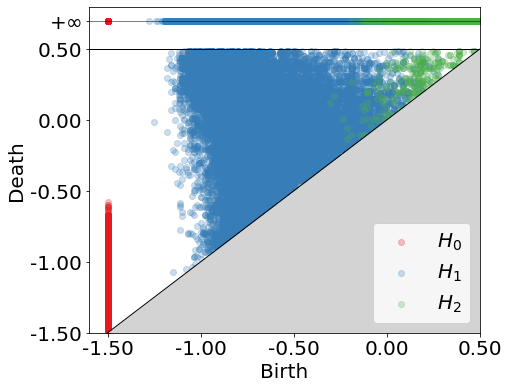

In [11]:
fig = plot_pds(persistence_er,alpha=0.25)
plt.savefig(root_fig +'stability_er.jpeg', dpi=500,bbox_inches='tight')

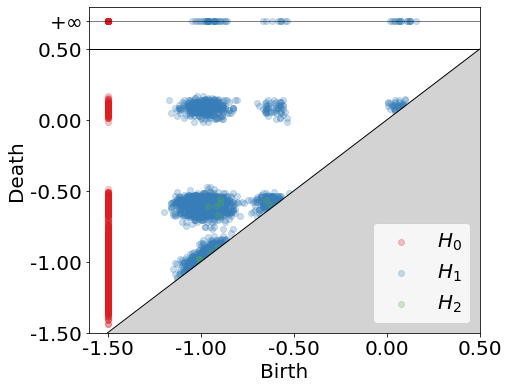

In [13]:
fig = plot_pds(persistence_sbm,alpha=0.25)
plt.savefig(root_fig +'stability_sbm.jpeg', dpi=500,bbox_inches='tight')

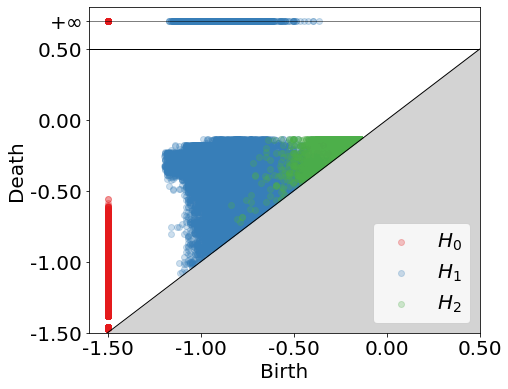

In [12]:
fig = plot_pds(persistence_single,alpha=0.25)
plt.savefig(root_fig +'stability_single.jpeg', dpi=500,bbox_inches='tight')